In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Load the data
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

# Use a pipeline to scale and fit
model = make_pipeline(StandardScaler(), LinearRegression())

# Perform 5-fold cross-validation (can also try 10)
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", scores)
# print("Mean R² Score:", np.mean(scores))
print("Mean MSE Score:", np.mean(scores))


Cross-Validation R² Scores: [0.54866323 0.46820691 0.55078434 0.53698703 0.66051406]
Mean MSE Score: 0.5530311140279565


In [8]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Create the pipeline
pipeline = make_pipeline(StandardScaler(), Ridge())

# Define the hyperparameter grid
param_grid = {'ridge__alpha': [0.1, 1.0, 10.0, 100.0]}

# Use GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid.fit(X, y)

# Best result
print("Best alpha:", grid.best_params_)
print("Best R² Score:", grid.best_score_)


Best alpha: {'ridge__alpha': 10.0}
Best R² Score: 0.5530540518289947


In [9]:
# Let's prepare for logistic regression with cross-validation and hyperparameter tuning
# Load the breast cancer dataset from sklearn and prepare data

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Set up a simple logistic regression model
model = LogisticRegression(max_iter=10000)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Fit the model on training data
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

cv_scores, report, conf_matrix

(array([0.97802198, 0.96703297, 1.        , 0.97802198, 0.95604396]),
 {'0': {'precision': 0.9761904761904762,
   'recall': 0.9534883720930233,
   'f1-score': 0.9647058823529412,
   'support': 43.0},
  '1': {'precision': 0.9722222222222222,
   'recall': 0.9859154929577465,
   'f1-score': 0.9790209790209791,
   'support': 71.0},
  'accuracy': 0.9736842105263158,
  'macro avg': {'precision': 0.9742063492063492,
   'recall': 0.9697019325253848,
   'f1-score': 0.9718634306869601,
   'support': 114.0},
  'weighted avg': {'precision': 0.9737190197716513,
   'recall': 0.9736842105263158,
   'f1-score': 0.973621425014614,
   'support': 114.0}},
 array([[41,  2],
        [ 1, 70]], dtype=int64))

In [10]:
# Let's perform hyperparameter tuning with GridSearchCV for Logistic Regression

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'penalty': ['l1', 'l2'],                # Regularization type
    'solver': ['liblinear']                # Solver that supports both l1 and l2
}

# Create GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='accuracy')

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate the best model on test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
test_report = classification_report(y_test, y_pred_best, output_dict=True)
test_conf_matrix = confusion_matrix(y_test, y_pred_best)

best_params, best_score, test_report, test_conf_matrix


({'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'},
 0.9780219780219781,
 {'0': {'precision': 1.0,
   'recall': 0.9767441860465116,
   'f1-score': 0.9882352941176471,
   'support': 43.0},
  '1': {'precision': 0.9861111111111112,
   'recall': 1.0,
   'f1-score': 0.993006993006993,
   'support': 71.0},
  'accuracy': 0.9912280701754386,
  'macro avg': {'precision': 0.9930555555555556,
   'recall': 0.9883720930232558,
   'f1-score': 0.99062114356232,
   'support': 114.0},
  'weighted avg': {'precision': 0.991349902534113,
   'recall': 0.9912280701754386,
   'f1-score': 0.991207141671538,
   'support': 114.0}},
 array([[42,  1],
        [ 0, 71]], dtype=int64))

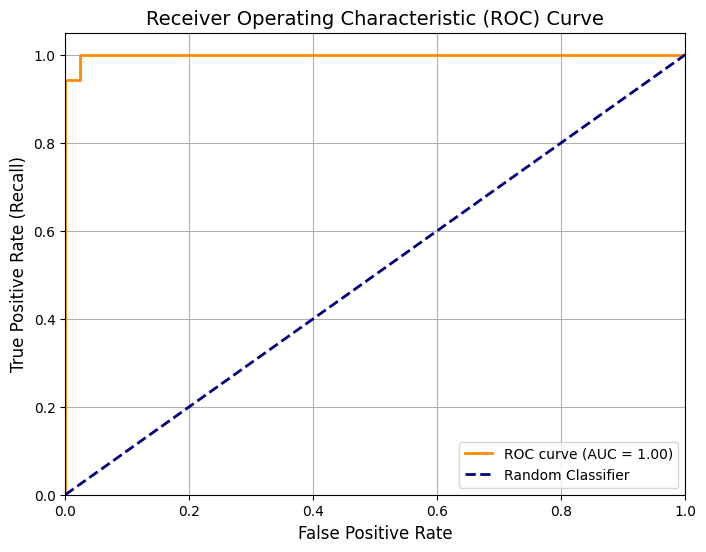

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for class 1 (benign)
y_probs = best_model.predict_proba(X_test)[:, 1]

# Compute False Positive Rate, True Positive Rate, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
